In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [21]:
affair = []
for i in df["affairs"]:
    if(i == 0):
        affair.append(0)
    else:
        affair.append(1)

In [23]:
df["affair"] = affair

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [25]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [29]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [35]:
sns.set_style("darkgrid")

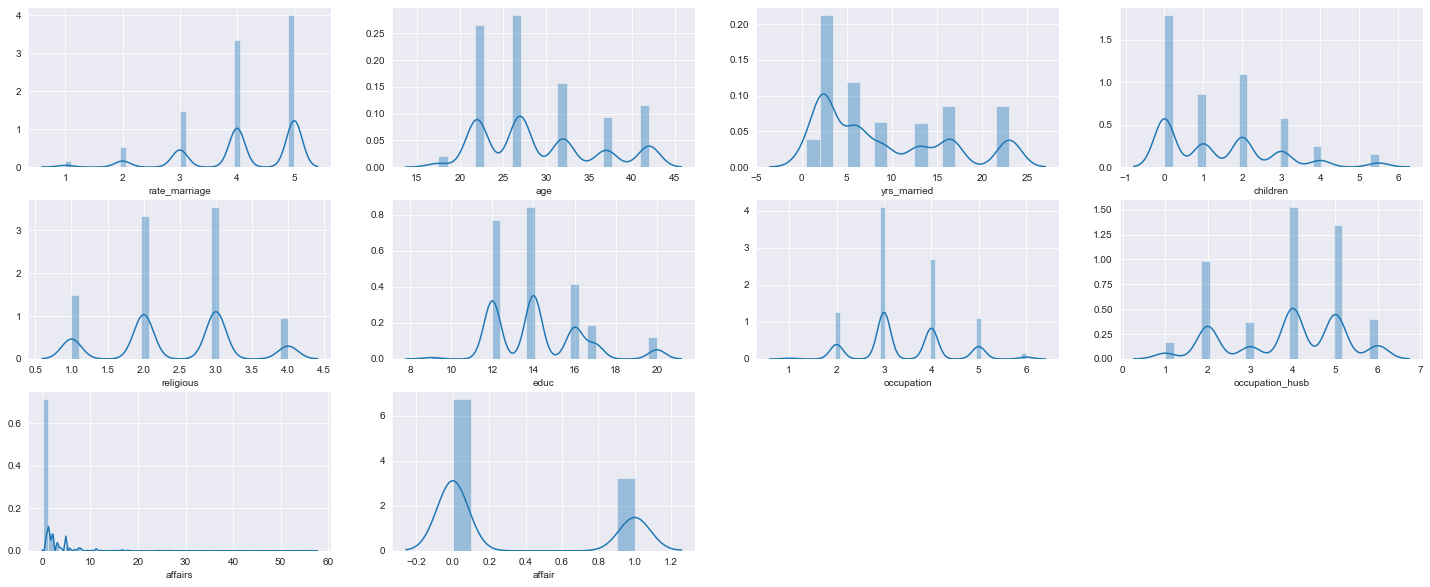

In [45]:
fig = plt.figure(figsize=(25,10))
for i in range(len(df.columns)):
    ax = plt.subplot(3,4, i+1)
    sns.distplot(df[df.columns[i]])

In [57]:
x = df.iloc[:,0:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x,y, stratify = y)

In [59]:
print("X Train", len(x_train))
print("Y_Train", len(y_train))
print("X_test", len(x_test))
print("Y_test", len(y_test))

X Train 4774
Y_Train 4774
X_test 1592
Y_test 1592


In [60]:
ra = RandomForestClassifier()
ra.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
imp = ra.feature_importances_

In [76]:
imp

array([0.04137151, 0.0037513 , 0.01996023, 0.00544359, 0.00532701,
       0.00306455, 0.00285045, 0.00215168, 0.91607968])

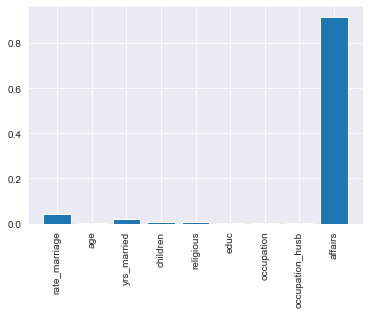

In [75]:
plt.bar(x = list(df.columns[0:len(df.columns)-1]), height = imp)
plt.xticks(rotation = 90)
plt.show()

In [77]:
X = df[["affairs"]]
y = df[["affair"]]

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [79]:
lr = LogisticRegression()

In [80]:
lr.fit(x_train,y_train)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [81]:
lr.score(x_test, y_test)

0.9616834170854272

In [123]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [98]:
cm = confusion_matrix(y_test,lr.predict(x_test))

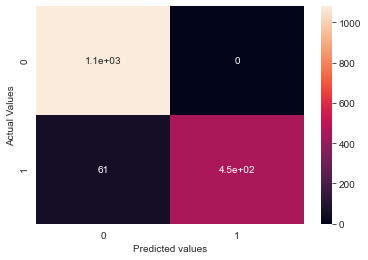

In [111]:
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual Values")
plt.show()

In [100]:
cr = classification_report(y_test,lr.predict(x_test) )

In [114]:
print(cr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1079
           1       1.00      0.88      0.94       513

    accuracy                           0.96      1592
   macro avg       0.97      0.94      0.95      1592
weighted avg       0.96      0.96      0.96      1592



In [116]:
true_positive = cm[0][0]
true_negative = cm[1][1]
false_positive = cm[1][0]
false_negative = cm[0][1]

In [117]:
accuracy = (true_positive + true_negative)/(true_positive + true_negative + false_negative + false_positive)
print(round(accuracy,2))

0.96


In [118]:
recall = (true_positive)/(true_positive + false_negative)
print(round(recall,2))

1.0


In [119]:
precison = true_positive/(true_positive + false_positive)
print(round(precison,2))

0.95


In [121]:
f1 = 2*((precison * recall)/ (precison + recall))
print(round(f1,2))

0.97


In [122]:
roc_auc_score(y_test, lr.predict(x_test))

0.9405458089668616

In [125]:
fpr, tpr, threshold = roc_curve(y_test, lr.predict(x_test))

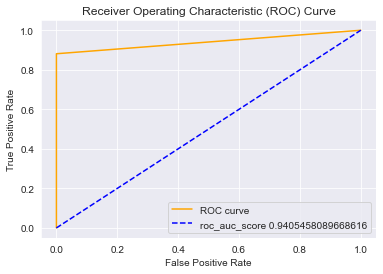

In [139]:
plt.plot(fpr, tpr, color = "orange", label = "ROC curve")
plt.plot([0,1], linestyle = "--",color = "blue",label = "roc_auc_score {}".format(roc_auc_score(y_test, lr.predict(x_test))))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()